# 📊 Exploration du Dataset - Classification de Styles de Décoration

Ce notebook explore le dataset d'images de styles de décoration pour comprendre sa structure, sa qualité et ses caractéristiques.

## Objectifs :
1. Vérifier la structure du dataset
2. Compter les images par style
3. Vérifier la validité des images
4. Analyser les dimensions et formats
5. Visualiser des exemples de chaque style
6. Générer un rapport d'exploration


## 1. Importation des bibliothèques


In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration matplotlib pour de meilleures visualisations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline


## 2. Configuration des chemins


In [2]:
# Chemin vers le dataset
DATASET_PATH = Path('../dataset')

# Mapping des noms de dossiers français vers les noms anglais pour le modèle
STYLE_MAPPING = {
    'boheme': 'bohemian',
    'royal': 'royal',
    'minimaliste': 'minimalist',
    'rustique': 'rustic',
    'vintage': 'vintage',
    'moderne': 'modern',
    'industriel': 'industrial'
}

# Ordre des styles pour l'affichage
STYLE_ORDER = ['bohemian', 'royal', 'minimalist', 'rustic', 'vintage', 'modern', 'industrial']

print(f"📁 Chemin du dataset : {DATASET_PATH.absolute()}")
print(f"✅ Dataset existe : {DATASET_PATH.exists()}")


📁 Chemin du dataset : d:\Computer-Vision\Computer-vision-project\notebooks\..\dataset
✅ Dataset existe : True


## 3. Vérification de la structure du dataset


In [3]:
def check_dataset_structure(dataset_path):
    """
    Vérifie la structure du dataset et liste tous les dossiers de styles.
    
    Returns:
        dict: Dictionnaire avec les informations sur chaque style
    """
    styles_info = {}
    
    if not dataset_path.exists():
        print(f"❌ Erreur : Le dossier {dataset_path} n'existe pas !")
        return styles_info
    
    print("\n📂 Structure du dataset :")
    print("=" * 60)
    
    # Lister tous les dossiers dans le dataset
    style_dirs = [d for d in dataset_path.iterdir() if d.is_dir()]
    
    for style_dir in sorted(style_dirs):
        style_name = style_dir.name
        
        # Compter les fichiers image
        image_extensions = {'.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG'}
        image_files = [f for f in style_dir.iterdir() 
                      if f.suffix in image_extensions and f.is_file()]
        
        # Nom anglais pour le modèle
        english_name = STYLE_MAPPING.get(style_name, style_name)
        
        styles_info[style_name] = {
            'english_name': english_name,
            'path': style_dir,
            'image_count': len(image_files),
            'image_files': image_files
        }
        
        print(f"\n📁 {style_name:15s} → {english_name:15s} : {len(image_files):5d} images")
    
    print("\n" + "=" * 60)
    
    return styles_info

# Exécuter la vérification
styles_info = check_dataset_structure(DATASET_PATH)



📂 Structure du dataset :

📁 boheme          → bohemian        :  6576 images

📁 industriel      → industrial      :  4185 images

📁 minimaliste     → minimalist      :  5034 images

📁 moderne         → modern          :  6289 images

📁 royal           → royal           :  6163 images

📁 rustique        → rustic          :  6596 images

📁 vintage         → vintage         :  6489 images



## 4. Statistiques globales du dataset


In [4]:
def print_dataset_statistics(styles_info):
    """
    Affiche les statistiques globales du dataset.
    """
    total_images = sum(info['image_count'] for info in styles_info.values())
    num_styles = len(styles_info)
    
    print("\n📊 STATISTIQUES GLOBALES DU DATASET")
    print("=" * 60)
    print(f"Nombre total de styles : {num_styles}")
    print(f"Nombre total d'images : {total_images:,}")
    print(f"Moyenne d'images par style : {total_images/num_styles:.0f}")
    
    # Trouver le style avec le plus/moins d'images
    max_style = max(styles_info.items(), key=lambda x: x[1]['image_count'])
    min_style = min(styles_info.items(), key=lambda x: x[1]['image_count'])
    
    print(f"\n📈 Style avec le plus d'images : {max_style[0]} ({max_style[1]['image_count']:,} images)")
    print(f"📉 Style avec le moins d'images : {min_style[0]} ({min_style[1]['image_count']:,} images)")
    print(f"📊 Écart : {max_style[1]['image_count'] - min_style[1]['image_count']:,} images")
    
    # Calculer le déséquilibre
    imbalance_ratio = max_style[1]['image_count'] / min_style[1]['image_count']
    print(f"⚖️  Ratio de déséquilibre : {imbalance_ratio:.2f}x")
    
    if imbalance_ratio > 1.5:
        print("⚠️  ATTENTION : Le dataset est déséquilibré. Considérer des techniques de rééquilibrage.")
    else:
        print("✅ Le dataset est relativement équilibré.")
    
    print("\n" + "=" * 60)

print_dataset_statistics(styles_info)



📊 STATISTIQUES GLOBALES DU DATASET
Nombre total de styles : 7
Nombre total d'images : 41,332
Moyenne d'images par style : 5905

📈 Style avec le plus d'images : rustique (6,596 images)
📉 Style avec le moins d'images : industriel (4,185 images)
📊 Écart : 2,411 images
⚖️  Ratio de déséquilibre : 1.58x
⚠️  ATTENTION : Le dataset est déséquilibré. Considérer des techniques de rééquilibrage.



## 5. Visualisation de la distribution des images


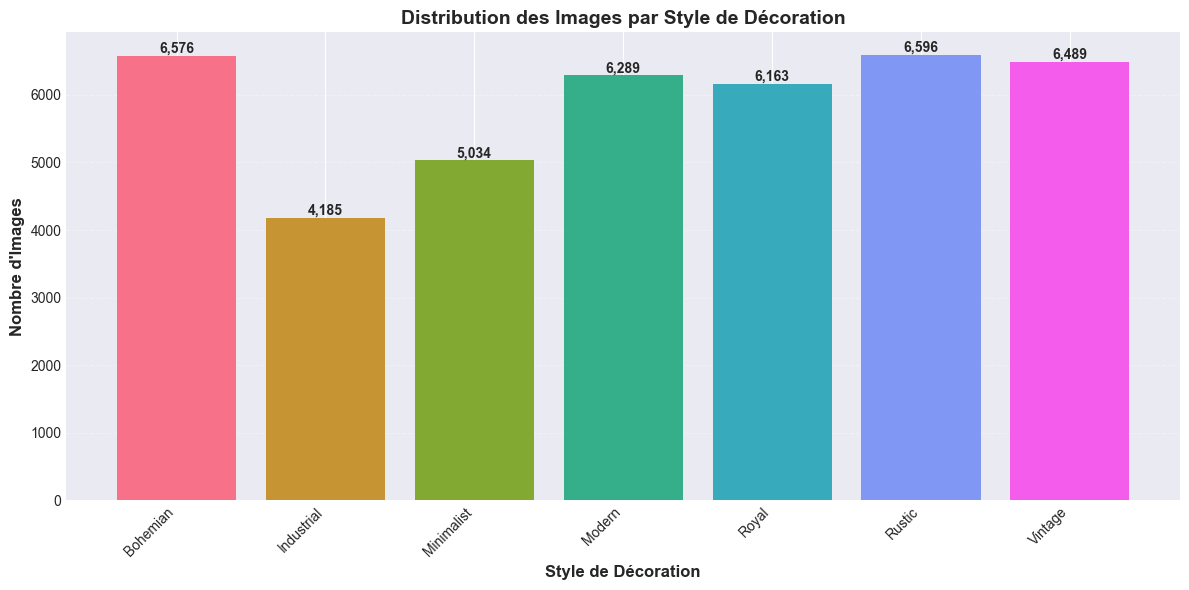

In [5]:
def plot_image_distribution(styles_info):
    """
    Crée un graphique en barres montrant la distribution des images par style.
    """
    # Préparer les données
    style_names = []
    image_counts = []
    
    for style_name, info in sorted(styles_info.items()):
        style_names.append(info['english_name'].title())
        image_counts.append(info['image_count'])
    
    # Créer la figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    bars = ax.bar(style_names, image_counts, color=sns.color_palette("husl", len(style_names)))
    
    # Ajouter les valeurs sur les barres
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    ax.set_xlabel('Style de Décoration', fontsize=12, fontweight='bold')
    ax.set_ylabel("Nombre d'Images", fontsize=12, fontweight='bold')
    ax.set_title("Distribution des Images par Style de Décoration", fontsize=14, fontweight='bold')
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_image_distribution(styles_info)


## 6. Vérification de la validité des images


In [6]:
def validate_images(styles_info, sample_size=None, verbose=True):
    """
    Vérifie que toutes les images peuvent être lues correctement.
    
    Args:
        styles_info: Dictionnaire avec les informations sur les styles
        sample_size: Nombre d'images à vérifier par style (None = toutes)
        verbose: Afficher les détails
    
    Returns:
        dict: Statistiques de validation par style
    """
    validation_results = {}
    
    print("\n🔍 VALIDATION DES IMAGES")
    print("=" * 60)
    
    for style_name, info in sorted(styles_info.items()):
        image_files = info['image_files']
        
        # Échantillonner si nécessaire
        if sample_size and len(image_files) > sample_size:
            import random
            image_files = random.sample(image_files, sample_size)
            sample_note = f" (échantillon de {sample_size})"
        else:
            sample_note = ""
        
        valid_count = 0
        invalid_files = []
        
        for img_file in image_files:
            try:
                with Image.open(img_file) as img:
                    img.verify()  # Vérifie que l'image est valide
                valid_count += 1
            except Exception as e:
                invalid_files.append((img_file.name, str(e)))
        
        validation_results[style_name] = {
            'total_checked': len(image_files),
            'valid': valid_count,
            'invalid': len(invalid_files),
            'invalid_files': invalid_files
        }
        
        if verbose:
            status = "✅" if len(invalid_files) == 0 else "⚠️ "
            print(f"{status} {style_name:15s} : {valid_count:5d}/{len(image_files):5d} valides{sample_note}")
            
            if invalid_files:
                print(f"   ⚠️  Fichiers invalides : {len(invalid_files)}")
                for invalid_file, error in invalid_files[:3]:  # Afficher max 3 erreurs
                    print(f"      - {invalid_file}: {error[:50]}")
    
    print("\n" + "=" * 60)
    
    return validation_results

# Valider toutes les images (peut prendre du temps si beaucoup d'images)
# Pour un test rapide, on peut utiliser sample_size=100
print("⏳ Validation en cours... (cela peut prendre quelques minutes)")
validation_results = validate_images(styles_info, sample_size=None, verbose=True)


⏳ Validation en cours... (cela peut prendre quelques minutes)

🔍 VALIDATION DES IMAGES
✅ boheme          :  6576/ 6576 valides
✅ industriel      :  4185/ 4185 valides
✅ minimaliste     :  5034/ 5034 valides
✅ moderne         :  6289/ 6289 valides
✅ royal           :  6163/ 6163 valides
✅ rustique        :  6596/ 6596 valides
✅ vintage         :  6489/ 6489 valides



## 7. Analyse des dimensions et formats des images


In [7]:
def analyze_image_properties(styles_info, sample_size=200):
    """
    Analyse les dimensions, formats et autres propriétés des images.
    
    Args:
        styles_info: Dictionnaire avec les informations sur les styles
        sample_size: Nombre d'images à analyser par style
    
    Returns:
        pd.DataFrame: DataFrame avec les propriétés de toutes les images analysées
    """
    import random
    
    all_properties = []
    
    print("\n📐 ANALYSE DES PROPRIÉTÉS DES IMAGES")
    print("=" * 60)
    print(f"Analyse de {sample_size} images par style...\n")
    
    for style_name, info in sorted(styles_info.items()):
        image_files = info['image_files']
        
        # Échantillonner
        if len(image_files) > sample_size:
            sampled_files = random.sample(image_files, sample_size)
        else:
            sampled_files = image_files
        
        for img_file in sampled_files:
            try:
                with Image.open(img_file) as img:
                    width, height = img.size
                    format_type = img.format
                    mode = img.mode
                    
                    all_properties.append({
                        'style': info['english_name'],
                        'style_fr': style_name,
                        'filename': img_file.name,
                        'width': width,
                        'height': height,
                        'aspect_ratio': width / height,
                        'format': format_type,
                        'mode': mode,
                        'file_size_kb': img_file.stat().st_size / 1024
                    })
            except Exception as e:
                continue
    
    df = pd.DataFrame(all_properties)
    
    # Statistiques globales
    print("📊 STATISTIQUES GLOBALES :")
    print(f"   Largeur moyenne : {df['width'].mean():.0f} px")
    print(f"   Hauteur moyenne : {df['height'].mean():.0f} px")
    print(f"   Ratio largeur/hauteur moyen : {df['aspect_ratio'].mean():.2f}")
    print(f"   Taille de fichier moyenne : {df['file_size_kb'].mean():.1f} KB")
    
    # Formats
    print(f"\n📁 FORMATS D'IMAGES :")
    format_counts = df['format'].value_counts()
    for fmt, count in format_counts.items():
        print(f"   {fmt}: {count} images ({count/len(df)*100:.1f}%)")
    
    # Modes de couleur
    print(f"\n🎨 MODES DE COULEUR :")
    mode_counts = df['mode'].value_counts()
    for mode, count in mode_counts.items():
        print(f"   {mode}: {count} images ({count/len(df)*100:.1f}%)")
    
    print("\n" + "=" * 60)
    
    return df

# Analyser les propriétés (échantillon de 200 images par style pour la rapidité)
df_properties = analyze_image_properties(styles_info, sample_size=200)



📐 ANALYSE DES PROPRIÉTÉS DES IMAGES
Analyse de 200 images par style...

📊 STATISTIQUES GLOBALES :
   Largeur moyenne : 256 px
   Hauteur moyenne : 256 px
   Ratio largeur/hauteur moyen : 1.00
   Taille de fichier moyenne : 12.6 KB

📁 FORMATS D'IMAGES :
   JPEG: 1400 images (100.0%)

🎨 MODES DE COULEUR :
   RGB: 1400 images (100.0%)



## 8. Visualisations des dimensions


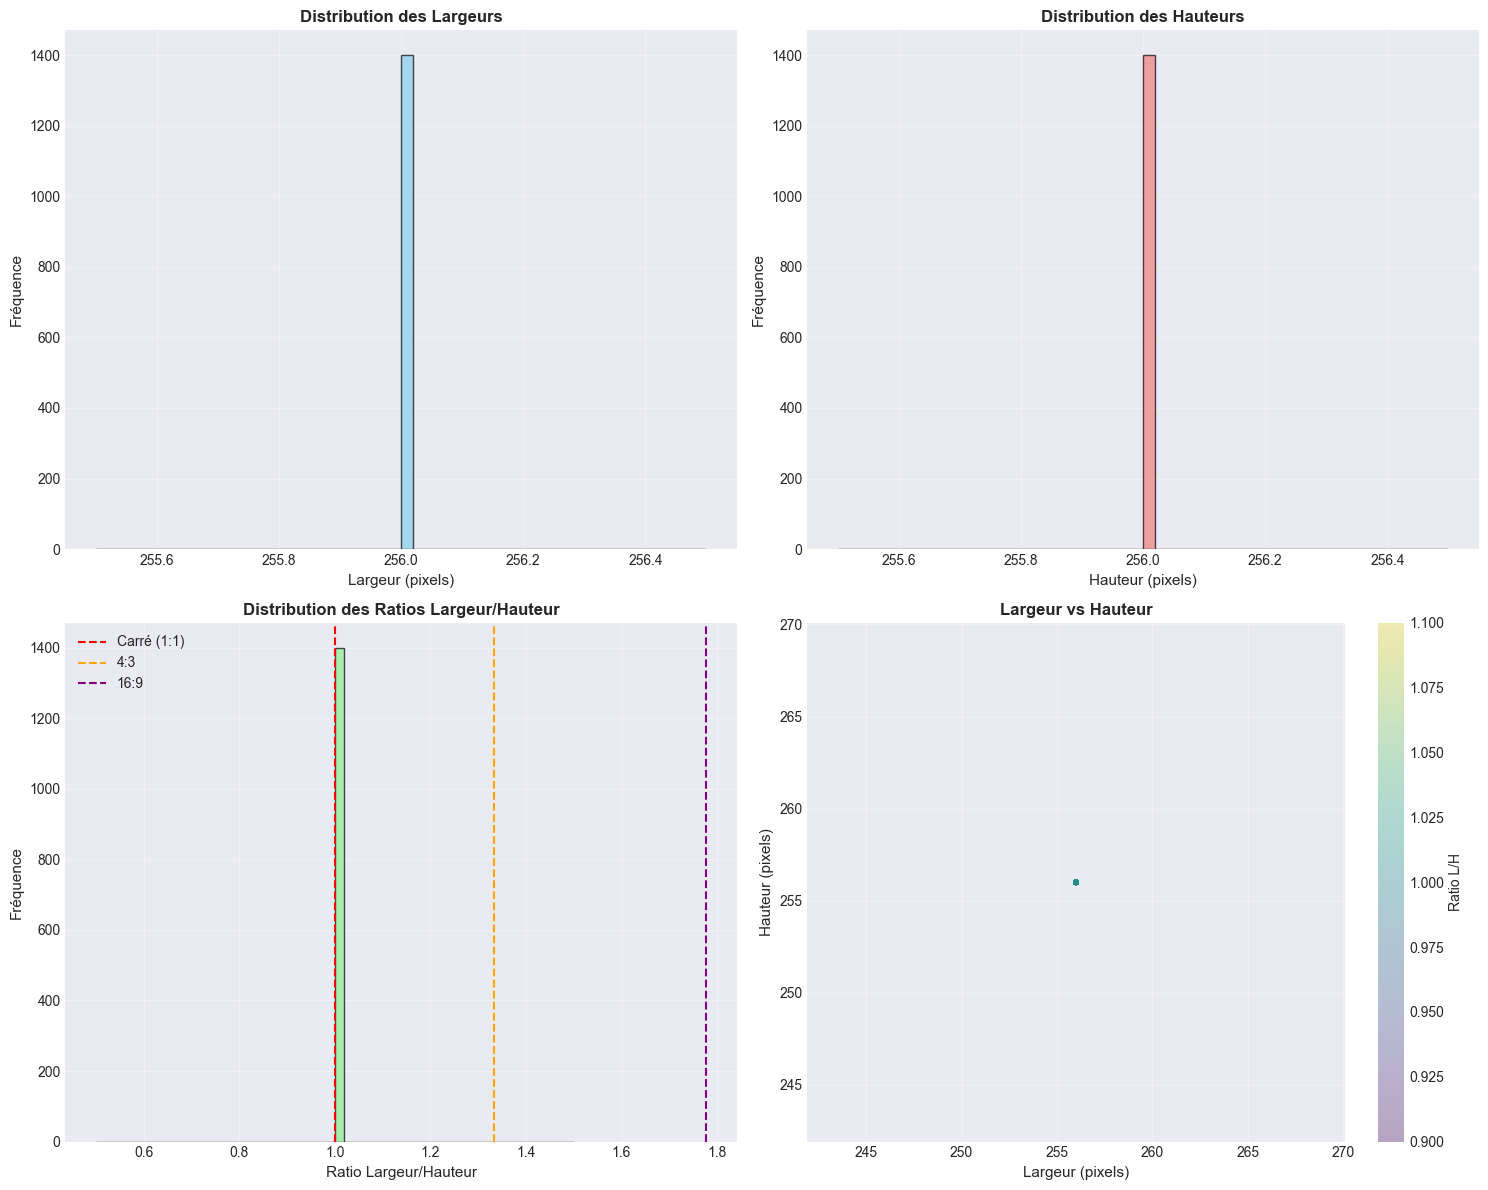

In [8]:
def plot_image_dimensions(df_properties):
    """
    Crée des visualisations des dimensions des images.
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Distribution des largeurs
    axes[0, 0].hist(df_properties['width'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, 0].set_xlabel('Largeur (pixels)', fontsize=11)
    axes[0, 0].set_ylabel('Fréquence', fontsize=11)
    axes[0, 0].set_title('Distribution des Largeurs', fontsize=12, fontweight='bold')
    axes[0, 0].grid(alpha=0.3)
    
    # 2. Distribution des hauteurs
    axes[0, 1].hist(df_properties['height'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
    axes[0, 1].set_xlabel('Hauteur (pixels)', fontsize=11)
    axes[0, 1].set_ylabel('Fréquence', fontsize=11)
    axes[0, 1].set_title('Distribution des Hauteurs', fontsize=12, fontweight='bold')
    axes[0, 1].grid(alpha=0.3)
    
    # 3. Distribution des ratios largeur/hauteur
    axes[1, 0].hist(df_properties['aspect_ratio'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[1, 0].set_xlabel('Ratio Largeur/Hauteur', fontsize=11)
    axes[1, 0].set_ylabel('Fréquence', fontsize=11)
    axes[1, 0].set_title('Distribution des Ratios Largeur/Hauteur', fontsize=12, fontweight='bold')
    axes[1, 0].axvline(x=1.0, color='red', linestyle='--', label='Carré (1:1)')
    axes[1, 0].axvline(x=4/3, color='orange', linestyle='--', label='4:3')
    axes[1, 0].axvline(x=16/9, color='purple', linestyle='--', label='16:9')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)
    
    # 4. Scatter plot Largeur vs Hauteur
    scatter = axes[1, 1].scatter(df_properties['width'], df_properties['height'], 
                                alpha=0.3, s=10, c=df_properties['aspect_ratio'], 
                                cmap='viridis')
    axes[1, 1].set_xlabel('Largeur (pixels)', fontsize=11)
    axes[1, 1].set_ylabel('Hauteur (pixels)', fontsize=11)
    axes[1, 1].set_title('Largeur vs Hauteur', fontsize=12, fontweight='bold')
    axes[1, 1].grid(alpha=0.3)
    plt.colorbar(scatter, ax=axes[1, 1], label='Ratio L/H')
    
    plt.tight_layout()
    plt.show()

plot_image_dimensions(df_properties)


## 9. Visualisation d'exemples de chaque style


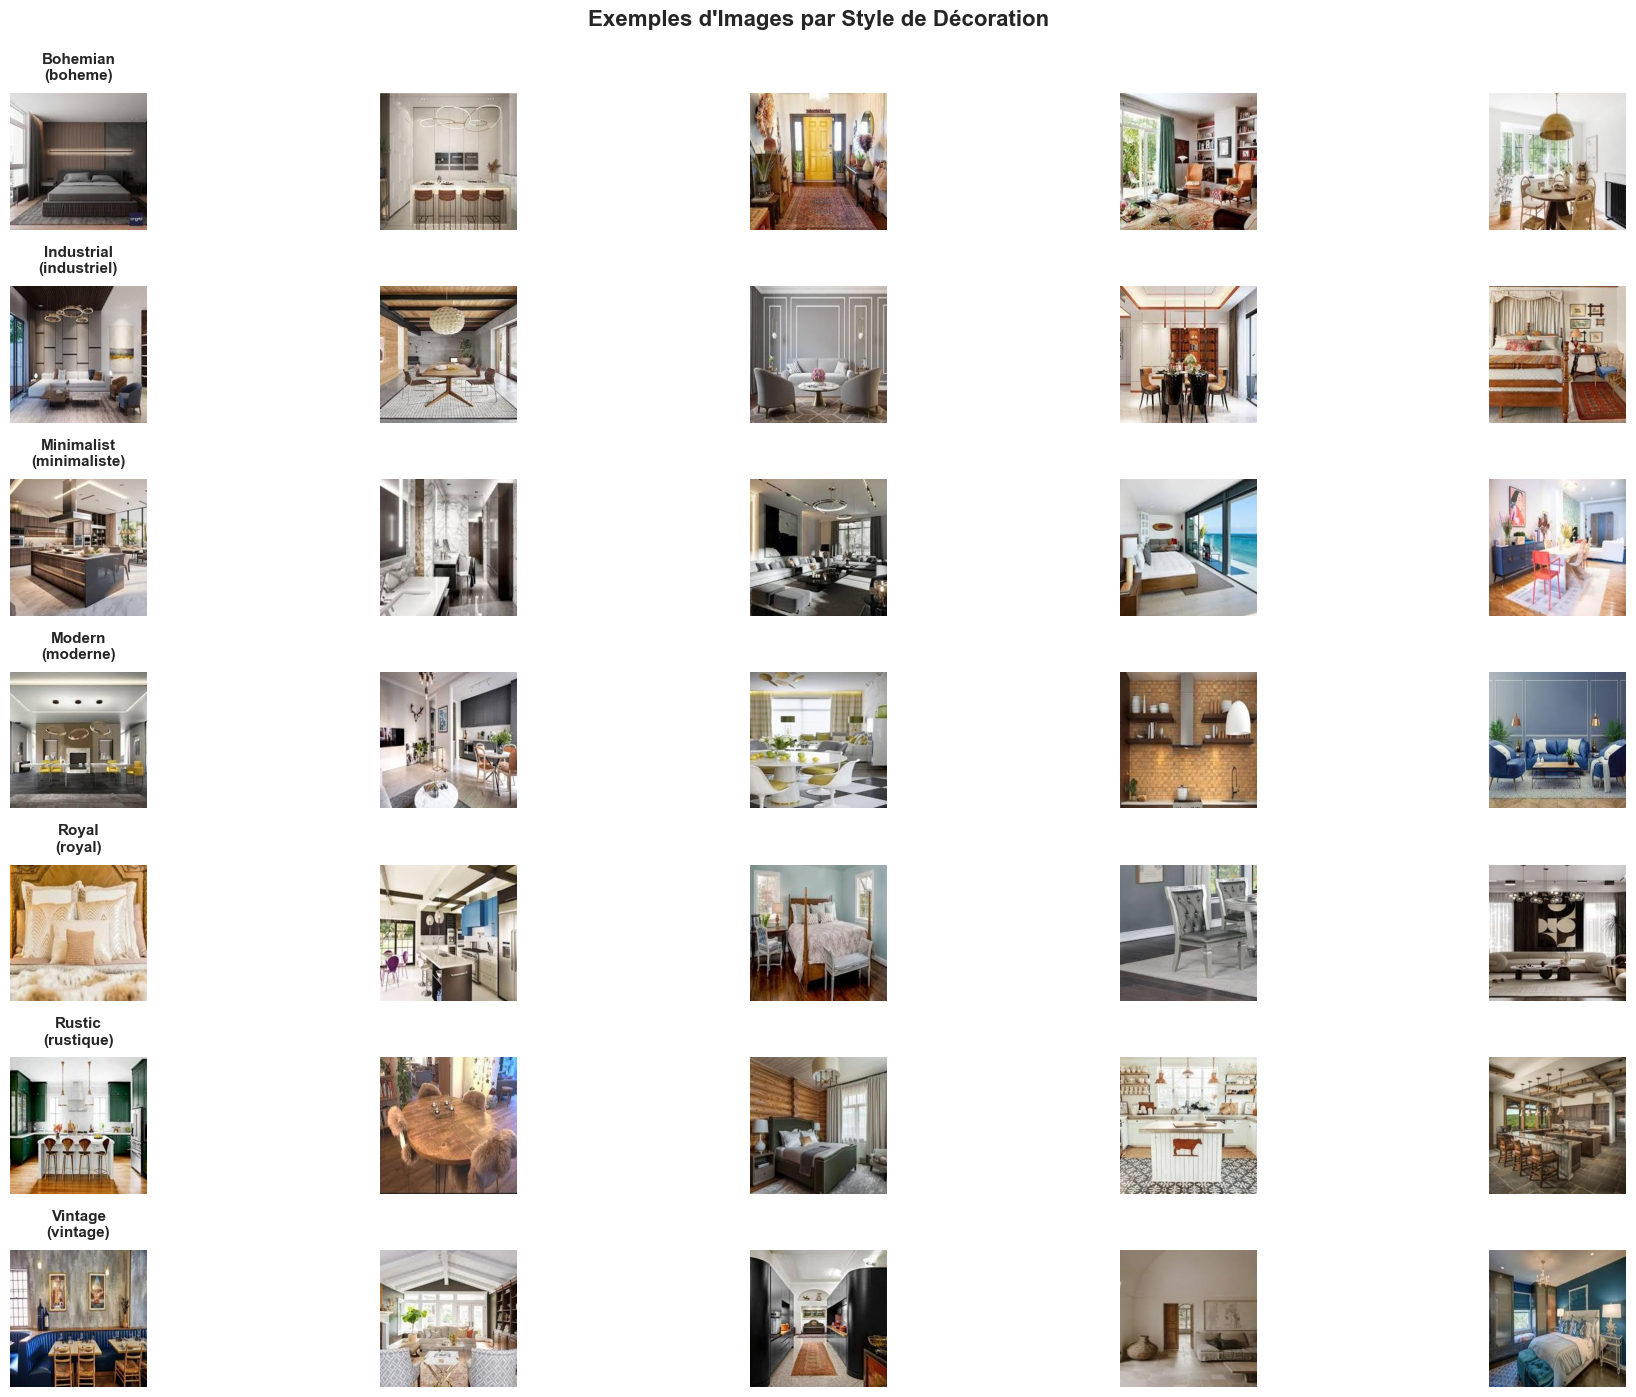

In [9]:
def visualize_style_samples(styles_info, num_samples=5, figsize=(20, 14)):
    """
    Visualise des exemples d'images pour chaque style.
    
    Args:
        styles_info: Dictionnaire avec les informations sur les styles
        num_samples: Nombre d'exemples à afficher par style
        figsize: Taille de la figure
    """
    import random
    
    num_styles = len(styles_info)
    
    # Créer une grille : 7 lignes (styles) x num_samples colonnes
    fig, axes = plt.subplots(num_styles, num_samples, figsize=figsize)
    
    # Si un seul style, axes n'est pas un tableau 2D
    if num_styles == 1:
        axes = axes.reshape(1, -1)
    
    for row_idx, (style_name, info) in enumerate(sorted(styles_info.items())):
        image_files = info['image_files']
        english_name = info['english_name']
        
        # Sélectionner des images aléatoires
        if len(image_files) >= num_samples:
            sampled_files = random.sample(image_files, num_samples)
        else:
            sampled_files = image_files
        
        for col_idx, img_file in enumerate(sampled_files):
            ax = axes[row_idx, col_idx]
            
            try:
                img = Image.open(img_file)
                ax.imshow(img)
                ax.axis('off')
                
                # Titre sur la première image de chaque ligne
                if col_idx == 0:
                    ax.set_title(f"{english_name.title()}\n({style_name})", 
                               fontsize=11, fontweight='bold', pad=10)
            except Exception as e:
                ax.text(0.5, 0.5, f'Erreur\n{str(e)[:30]}', 
                       ha='center', va='center', transform=ax.transAxes,
                       fontsize=8, color='red')
                ax.axis('off')
    
    plt.suptitle("Exemples d'Images par Style de Décoration", 
                fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()

# Visualiser 5 exemples de chaque style
visualize_style_samples(styles_info, num_samples=5)


## 10. Génération du rapport d'exploration


In [10]:
def generate_exploration_report(styles_info, validation_results, df_properties):
    """
    Génère un rapport d'exploration complet du dataset.
    """
    report = []
    report.append("=" * 80)
    report.append("📊 RAPPORT D'EXPLORATION DU DATASET")
    report.append("=" * 80)
    report.append("")
    
    # 1. Résumé général
    total_images = sum(info['image_count'] for info in styles_info.values())
    report.append("1. RÉSUMÉ GÉNÉRAL")
    report.append("-" * 80)
    report.append(f"   • Nombre total de styles : {len(styles_info)}")
    report.append(f"   • Nombre total d'images : {total_images:,}")
    report.append(f"   • Moyenne d'images par style : {total_images/len(styles_info):.0f}")
    report.append("")
    
    # 2. Détails par style
    report.append("2. DÉTAILS PAR STYLE")
    report.append("-" * 80)
    for style_name, info in sorted(styles_info.items()):
        val_info = validation_results.get(style_name, {})
        valid_count = val_info.get('valid', info['image_count'])
        invalid_count = val_info.get('invalid', 0)
        
        report.append(f"   • {info['english_name'].title():15s} ({style_name:15s})")
        report.append(f"     - Images totales : {info['image_count']:,}")
        report.append(f"     - Images valides : {valid_count:,}")
        if invalid_count > 0:
            report.append(f"     - Images invalides : {invalid_count:,} ⚠️")
        report.append("")
    
    # 3. Propriétés des images
    if df_properties is not None and len(df_properties) > 0:
        report.append("3. PROPRIÉTÉS DES IMAGES")
        report.append("-" * 80)
        report.append(f"   • Largeur moyenne : {df_properties['width'].mean():.0f} px")
        report.append(f"   • Largeur min/max : {df_properties['width'].min():.0f} / {df_properties['width'].max():.0f} px")
        report.append(f"   • Hauteur moyenne : {df_properties['height'].mean():.0f} px")
        report.append(f"   • Hauteur min/max : {df_properties['height'].min():.0f} / {df_properties['height'].max():.0f} px")
        report.append(f"   • Ratio L/H moyen : {df_properties['aspect_ratio'].mean():.2f}")
        report.append(f"   • Taille fichier moyenne : {df_properties['file_size_kb'].mean():.1f} KB")
        report.append("")
        
        # Formats
        format_counts = df_properties['format'].value_counts()
        report.append("   • Formats d'images :")
        for fmt, count in format_counts.items():
            report.append(f"     - {fmt}: {count} ({count/len(df_properties)*100:.1f}%)")
        report.append("")
    
    # 4. Recommandations
    report.append("4. RECOMMANDATIONS POUR LA PRÉPARATION DES DONNÉES")
    report.append("-" * 80)
    
    # Vérifier le déséquilibre
    max_style = max(styles_info.items(), key=lambda x: x[1]['image_count'])
    min_style = min(styles_info.items(), key=lambda x: x[1]['image_count'])
    imbalance_ratio = max_style[1]['image_count'] / min_style[1]['image_count']
    
    if imbalance_ratio > 1.5:
        report.append("   ⚠️  Dataset déséquilibré détecté.")
        report.append(f"      - Considérer l'augmentation de données pour les styles minoritaires")
        report.append(f"      - Utiliser class_weight dans le modèle pour compenser")
        report.append("")
    
    # Vérifier les images invalides
    total_invalid = sum(v.get('invalid', 0) for v in validation_results.values())
    if total_invalid > 0:
        report.append(f"   ⚠️  {total_invalid} images invalides détectées.")
        report.append(f"      - Nettoyer le dataset avant l'entraînement")
        report.append("")
    
    report.append("   ✅ Prochaines étapes :")
    report.append("      1. Diviser le dataset en train (80%) et validation (20%)")
    report.append("      2. Configurer l'augmentation de données")
    report.append("      3. Préparer les générateurs de données")
    report.append("      4. Construire le modèle MobileNetV2")
    report.append("")
    
    report.append("=" * 80)
    
    return "\n".join(report)

# Générer et afficher le rapport
report = generate_exploration_report(styles_info, validation_results, df_properties)
print(report)

# Sauvegarder le rapport dans un fichier
report_path = Path('../models/exploration_report.txt')
report_path.parent.mkdir(exist_ok=True)
with open(report_path, 'w', encoding='utf-8') as f:
    f.write(report)

print(f"\n💾 Rapport sauvegardé dans : {report_path.absolute()}")


📊 RAPPORT D'EXPLORATION DU DATASET

1. RÉSUMÉ GÉNÉRAL
--------------------------------------------------------------------------------
   • Nombre total de styles : 7
   • Nombre total d'images : 41,332
   • Moyenne d'images par style : 5905

2. DÉTAILS PAR STYLE
--------------------------------------------------------------------------------
   • Bohemian        (boheme         )
     - Images totales : 6,576
     - Images valides : 6,576

   • Industrial      (industriel     )
     - Images totales : 4,185
     - Images valides : 4,185

   • Minimalist      (minimaliste    )
     - Images totales : 5,034
     - Images valides : 5,034

   • Modern          (moderne        )
     - Images totales : 6,289
     - Images valides : 6,289

   • Royal           (royal          )
     - Images totales : 6,163
     - Images valides : 6,163

   • Rustic          (rustique       )
     - Images totales : 6,596
     - Images valides : 6,596

   • Vintage         (vintage        )
     - Images to

## 11. Conclusion de l'exploration

L'exploration du dataset est terminée ! Vous devriez maintenant avoir une bonne compréhension de :

✅ La structure et la taille du dataset
✅ La distribution des images par style
✅ La qualité et la validité des images
✅ Les dimensions et formats des images
✅ Des exemples visuels de chaque style

**Prochaine étape :** Préparation des données (division train/validation, augmentation de données, générateurs)
